In [46]:
import numpy as np
import matplotlib.pyplot as plt
from catalogs import astrometry
from astropy import coordinates, units
import glob
import os.path

In [2]:
images = glob.glob("/media/ubuntu/data/dsa110/imaging/????-??-??_??????????-image.fits")
#gauls = glob.glob("/media/ubuntu/data/dsa110/imaging/????-??-??_??????????*zoom.pybdsm.gaul")  # very few sources
#gauls = glob.glob("/media/ubuntu/data/dsa110/imaging/??????????_tclean.pybdsm.gaul")
gauls = glob.glob("/media/ubuntu/data/dsa110/imaging/????-??-??_??????????-image.pybdsm.gaul")  # very few sources

In [3]:
srcnames = [os.path.basename(fn).split('_')[1].split('-')[0] for fn in gauls]
print(srcnames)

['220307aaae', '220121aaat', '220330aaan', '220319aaeb', '220208aaaa', '220207aabh', '220204aaai']


In [4]:
srcs = dict(zip(srcnames, zip(gauls,  [image for srcname in srcnames for image in images if srcname in image])))

In [41]:
name = '220204aaai'
dcat = astrometry.SourceCatalog(image=astrometry.Image(srcs[name][1]), catalogpath=srcs[name][0])
dcat.load(sparse=True)
print(f"{len(dcat._sources)} sources in sparsified catalog")

76 sources in sparsified catalog


In [42]:
im = astrometry.Image(srcs[name][1])
co = im.centre
print(co.ra.value, co.dec.value)

278.2076766666667 71.6326996944444


In [44]:
vcat = astrometry.VLASSCat().search(coordinates.SkyCoord(co.ra.value, co.dec.value, unit='deg'))
idx, sep2, _ = dcat.skycoords.match_to_catalog_sky(coordinates.SkyCoord(vcat["RA"], vcat["DEC"], unit='deg'))
sel = np.where(sep2 < 5*units.arcsec)[0]  # choose dsa sources near vlass sources

In [62]:
dcat._sources.iloc[sel]

,# Gaus_id,Isl_id,Source_id,Wave_id,RA,E_RA,DEC,E_DEC,Total_flux,E_Total_flux,...,E_DC_Min_img_plane,DC_PA_img_plane,E_DC_PA_img_plane,Isl_Total_flux,E_Isl_Total_flux,Isl_rms,Isl_mean,Resid_Isl_rms,Resid_Isl_mean,S_Code
0,0,0,0,0,-75.252669,0.000218,70.003850,0.000135,0.522948,0.081439,...,0.000279,51.236714,13.593857,0.419355,0.043620,0.034574,-2.013633e-04,0.010066,-0.000049,S
8,18,20,18,0,-76.620837,0.000343,72.251226,0.000328,0.243362,0.077091,...,0.000733,168.294667,112.578219,0.157768,0.031311,0.032764,-4.927686e-04,0.001322,-0.000497,S
11,22,25,22,0,-77.177780,0.000140,72.126485,0.000106,0.589182,0.072033,...,0.000238,18.014408,18.207209,0.486643,0.041086,0.032836,-8.684797e-04,0.006121,-0.001178,S
12,23,26,23,0,-77.624193,0.000066,71.623431,0.000038,1.312777,0.072159,...,0.000083,46.806108,4.581698,1.179385,0.055791,0.036406,-4.473863e-04,0.023022,0.000685,S
15,29,32,29,0,-77.918890,0.000411,70.984441,0.000325,0.269916,0.082566,...,0.000625,142.902422,32.336158,0.174257,0.033344,0.032638,-2.901641e-04,0.001448,-0.000287,S
19,40,42,40,0,-77.987994,0.000377,72.872714,0.000242,0.508797,0.105317,...,0.000466,56.217649,17.807057,0.349197,0.045955,0.034755,-5.829413e-04,0.009379,-0.000438,S
20,47,50,47,0,-78.843291,0.000391,70.227675,0.000300,0.286579,0.083413,...,0.000690,20.252281,50.919787,0.183089,0.030415,0.031826,-1.064757e-05,0.003138,0.000003,S
23,71,77,71,0,-78.630554,0.000152,73.677320,0.000126,0.756449,0.086684,...,0.000191,36.953474,8.470831,0.604550,0.051404,0.036745,-5.305883e-04,0.010797,-0.000365,S
25,79,86,79,0,-79.489595,0.000135,71.271176,0.000097,0.563569,0.066001,...,0.000207,28.370957,13.236342,0.473884,0.035587,0.031155,-4.257830e-04,0.006649,-0.000687,S
28,89,96,89,0,-80.204492,0.000133,72.579460,0.000077,0.776585,0.078607,...,0.000180,120.398980,10.109539,0.685543,0.042720,0.035340,-4.153985e-04,0.006243,-0.000704,S


In [63]:
vcat.iloc[idx[sel]]

,source_name,RA,DEC,Total_flux,Peak_flux,Maj,E_Maj,Min,E_Min,PA,E_PA,S_Code
428773,T28t10_J190123+693000_58,284.746643,70.003492,0.086829,0.081587,0.000845,0.000002,0.000648,0.000001,172.161421,0.408398,M
199019,T28t10_J185814+723000_47,283.380055,72.251459,0.010915,0.007369,0.001123,0.000029,0.000728,0.000013,128.621838,1.415688,S
119647,T28t10_J184518+723000_6,282.822318,72.126364,0.021444,0.018693,0.000992,0.000010,0.000646,0.000004,142.314864,2.366358,S
389576,T28t10_J184300+713000_0,282.375717,71.623260,0.107414,0.070909,0.001957,0.000011,0.000984,0.000004,96.485482,0.426607,M
389580,T28t10_J184300+713000_10,282.082259,70.984892,0.015835,0.000986,0.004047,0.000421,0.002163,0.000208,146.783543,12.169446,C
119657,T28t10_J184518+723000_18,282.012210,72.873047,0.014275,0.013500,0.000916,0.000013,0.000645,0.000006,139.080850,2.225832,S
83647,T28t10_J184055+703000_11,281.157428,70.227363,0.016883,0.016078,0.000884,0.000010,0.000627,0.000005,153.943407,2.178009,S
681236,T29t08_J184650+733000_51,281.369278,73.677159,0.060443,0.051521,0.001133,0.000004,0.000667,0.000001,95.582956,179.940135,S
389597,T28t10_J184300+713000_34,280.510347,71.270897,0.016330,0.014747,0.000894,0.000011,0.000675,0.000006,146.547398,1.496049,S
647711,T28t10_J183221+723000_0,279.796132,72.579312,0.034725,0.032636,0.000936,0.000005,0.000641,0.000003,136.225724,2.244694,S


In [ ]:
# or from sparsified catalog
#dcat = astrometry.make_cat('/home/ubuntu/claw/220207aabh_matched_vlass.csv')

In [7]:
dcat2, drap, ddecp = astrometry.match_ps1(cat.skycoords)


Entry 0
using columns: ['objID', 'raMean', 'decMean', 'gMeanPSFMag', 'gMeanPSFMagErr', 'rMeanPSFMag', 'rMeanPSFMagErr', 'iMeanPSFMag', 'iMeanPSFMagErr', 'zMeanPSFMag', 'zMeanPSFMagErr', 'yMeanPSFMag', 'yMeanPSFMagErr']
nothing

Entry 1
using columns: ['objID', 'raMean', 'decMean', 'gMeanPSFMag', 'gMeanPSFMagErr', 'rMeanPSFMag', 'rMeanPSFMagErr', 'iMeanPSFMag', 'iMeanPSFMagErr', 'zMeanPSFMag', 'zMeanPSFMagErr', 'yMeanPSFMag', 'yMeanPSFMagErr']
nothing

Entry 2
using columns: ['objID', 'raMean', 'decMean', 'gMeanPSFMag', 'gMeanPSFMagErr', 'rMeanPSFMag', 'rMeanPSFMagErr', 'iMeanPSFMag', 'iMeanPSFMagErr', 'zMeanPSFMag', 'zMeanPSFMagErr', 'yMeanPSFMag', 'yMeanPSFMagErr']

Entry 3
using columns: ['objID', 'raMean', 'decMean', 'gMeanPSFMag', 'gMeanPSFMagErr', 'rMeanPSFMag', 'rMeanPSFMagErr', 'iMeanPSFMag', 'iMeanPSFMagErr', 'zMeanPSFMag', 'zMeanPSFMagErr', 'yMeanPSFMag', 'yMeanPSFMagErr']
nothing

Entry 4
using columns: ['objID', 'raMean', 'decMean', 'gMeanPSFMag', 'gMeanPSFMagErr', 'rMeanPS

nothing

Entry 37
using columns: ['objID', 'raMean', 'decMean', 'gMeanPSFMag', 'gMeanPSFMagErr', 'rMeanPSFMag', 'rMeanPSFMagErr', 'iMeanPSFMag', 'iMeanPSFMagErr', 'zMeanPSFMag', 'zMeanPSFMagErr', 'yMeanPSFMag', 'yMeanPSFMagErr']
nothing

Entry 38
using columns: ['objID', 'raMean', 'decMean', 'gMeanPSFMag', 'gMeanPSFMagErr', 'rMeanPSFMag', 'rMeanPSFMagErr', 'iMeanPSFMag', 'iMeanPSFMagErr', 'zMeanPSFMag', 'zMeanPSFMagErr', 'yMeanPSFMag', 'yMeanPSFMagErr']
nothing

Entry 39
using columns: ['objID', 'raMean', 'decMean', 'gMeanPSFMag', 'gMeanPSFMagErr', 'rMeanPSFMag', 'rMeanPSFMagErr', 'iMeanPSFMag', 'iMeanPSFMagErr', 'zMeanPSFMag', 'zMeanPSFMagErr', 'yMeanPSFMag', 'yMeanPSFMagErr']

Entry 40
using columns: ['objID', 'raMean', 'decMean', 'gMeanPSFMag', 'gMeanPSFMagErr', 'rMeanPSFMag', 'rMeanPSFMagErr', 'iMeanPSFMag', 'iMeanPSFMagErr', 'zMeanPSFMag', 'zMeanPSFMagErr', 'yMeanPSFMag', 'yMeanPSFMagErr']
nothing

Entry 41
using columns: ['objID', 'raMean', 'decMean', 'gMeanPSFMag', 'gMeanPSFMagE


Entry 74
using columns: ['objID', 'raMean', 'decMean', 'gMeanPSFMag', 'gMeanPSFMagErr', 'rMeanPSFMag', 'rMeanPSFMagErr', 'iMeanPSFMag', 'iMeanPSFMagErr', 'zMeanPSFMag', 'zMeanPSFMagErr', 'yMeanPSFMag', 'yMeanPSFMagErr']

Entry 75
using columns: ['objID', 'raMean', 'decMean', 'gMeanPSFMag', 'gMeanPSFMagErr', 'rMeanPSFMag', 'rMeanPSFMagErr', 'iMeanPSFMag', 'iMeanPSFMagErr', 'zMeanPSFMag', 'zMeanPSFMagErr', 'yMeanPSFMag', 'yMeanPSFMagErr']

Entry 76
using columns: ['objID', 'raMean', 'decMean', 'gMeanPSFMag', 'gMeanPSFMagErr', 'rMeanPSFMag', 'rMeanPSFMagErr', 'iMeanPSFMag', 'iMeanPSFMagErr', 'zMeanPSFMag', 'zMeanPSFMagErr', 'yMeanPSFMag', 'yMeanPSFMagErr']
nothing

Entry 77
using columns: ['objID', 'raMean', 'decMean', 'gMeanPSFMag', 'gMeanPSFMagErr', 'rMeanPSFMag', 'rMeanPSFMagErr', 'iMeanPSFMag', 'iMeanPSFMagErr', 'zMeanPSFMag', 'zMeanPSFMagErr', 'yMeanPSFMag', 'yMeanPSFMagErr']
too many ps1 counterparts

Entry 78
using columns: ['objID', 'raMean', 'decMean', 'gMeanPSFMag', 'gMeanPSFMa

nothing

Entry 110
using columns: ['objID', 'raMean', 'decMean', 'gMeanPSFMag', 'gMeanPSFMagErr', 'rMeanPSFMag', 'rMeanPSFMagErr', 'iMeanPSFMag', 'iMeanPSFMagErr', 'zMeanPSFMag', 'zMeanPSFMagErr', 'yMeanPSFMag', 'yMeanPSFMagErr']
too many ps1 counterparts

Entry 111
using columns: ['objID', 'raMean', 'decMean', 'gMeanPSFMag', 'gMeanPSFMagErr', 'rMeanPSFMag', 'rMeanPSFMagErr', 'iMeanPSFMag', 'iMeanPSFMagErr', 'zMeanPSFMag', 'zMeanPSFMagErr', 'yMeanPSFMag', 'yMeanPSFMagErr']

Entry 112
using columns: ['objID', 'raMean', 'decMean', 'gMeanPSFMag', 'gMeanPSFMagErr', 'rMeanPSFMag', 'rMeanPSFMagErr', 'iMeanPSFMag', 'iMeanPSFMagErr', 'zMeanPSFMag', 'zMeanPSFMagErr', 'yMeanPSFMag', 'yMeanPSFMagErr']
nothing

Entry 113
using columns: ['objID', 'raMean', 'decMean', 'gMeanPSFMag', 'gMeanPSFMagErr', 'rMeanPSFMag', 'rMeanPSFMagErr', 'iMeanPSFMag', 'iMeanPSFMagErr', 'zMeanPSFMag', 'zMeanPSFMagErr', 'yMeanPSFMag', 'yMeanPSFMagErr']
nothing

Entry 114
using columns: ['objID', 'raMean', 'decMean', 'gMea

KeyboardInterrupt: 

In [6]:
vcat = astrometry.VLASSCat()
vcat2 = vcat.search(coordinates.SkyCoord(310.700, 71.600, unit='deg'))
idx, sep2, _ = dcat.match_to_catalog_sky(coordinates.SkyCoord(vcat2["RA"], vcat2["DEC"], unit='deg'))
vcat3 = vcat2.iloc[idx]

In [10]:
drad = []
ddecd = []
co_match = []
for i, co in enumerate(dcat):
    ra = vcat3.iloc[i]["RA"]
    dec = vcat3.iloc[i]["DEC"]
    drad.append((float(ra) - co.ra.value) * np.cos(np.radians(co.dec.value)) * 3600)
    ddecd.append((float(dec) - co.dec.value) * 3600)
    co_match.append(co)


In [7]:
im = astrometry.Image('/media/ubuntu/data/dsa110/imaging/2022-02-07_220207aabh-image.fits')

(<Figure size 1152x1152 with 1 Axes>,
 <matplotlib.axes._subplots.WCSAxesSubplot at 0x7fde014f5cc0>)

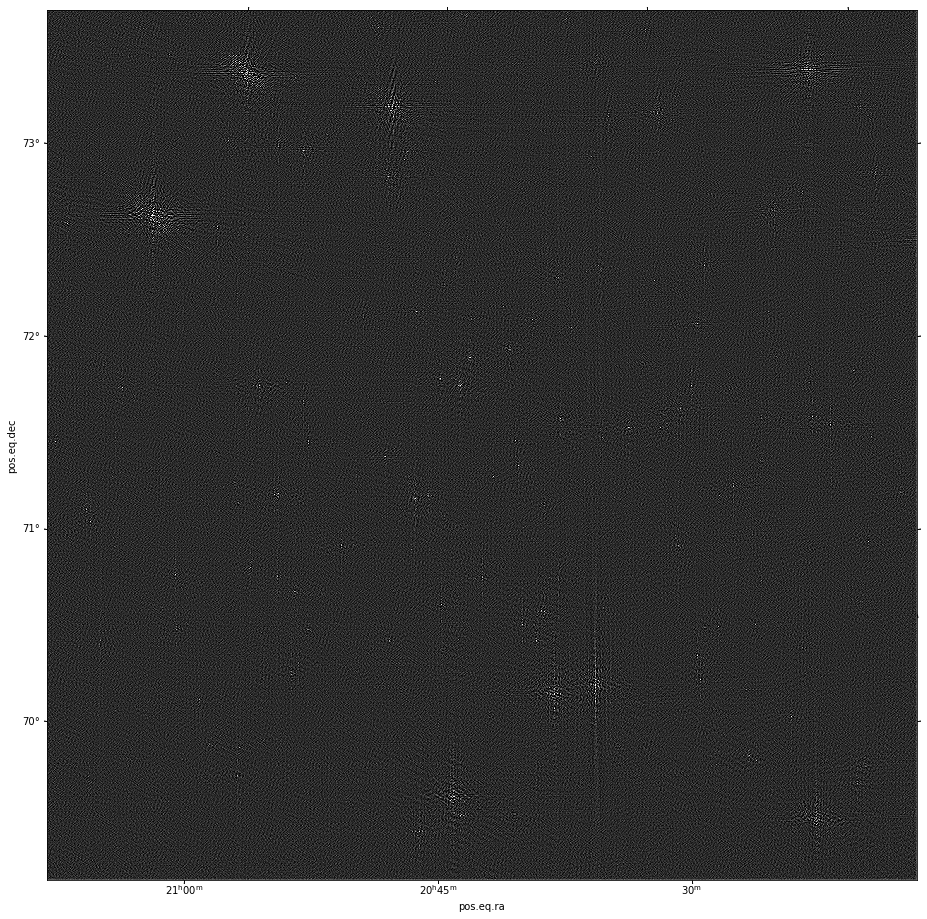

In [8]:
im.show()

In [11]:
im.add_arrows(co_match, drad, ddecd, 'white')

In [12]:
im.add_arrows(dcat2, drap, ddecp, 'red')

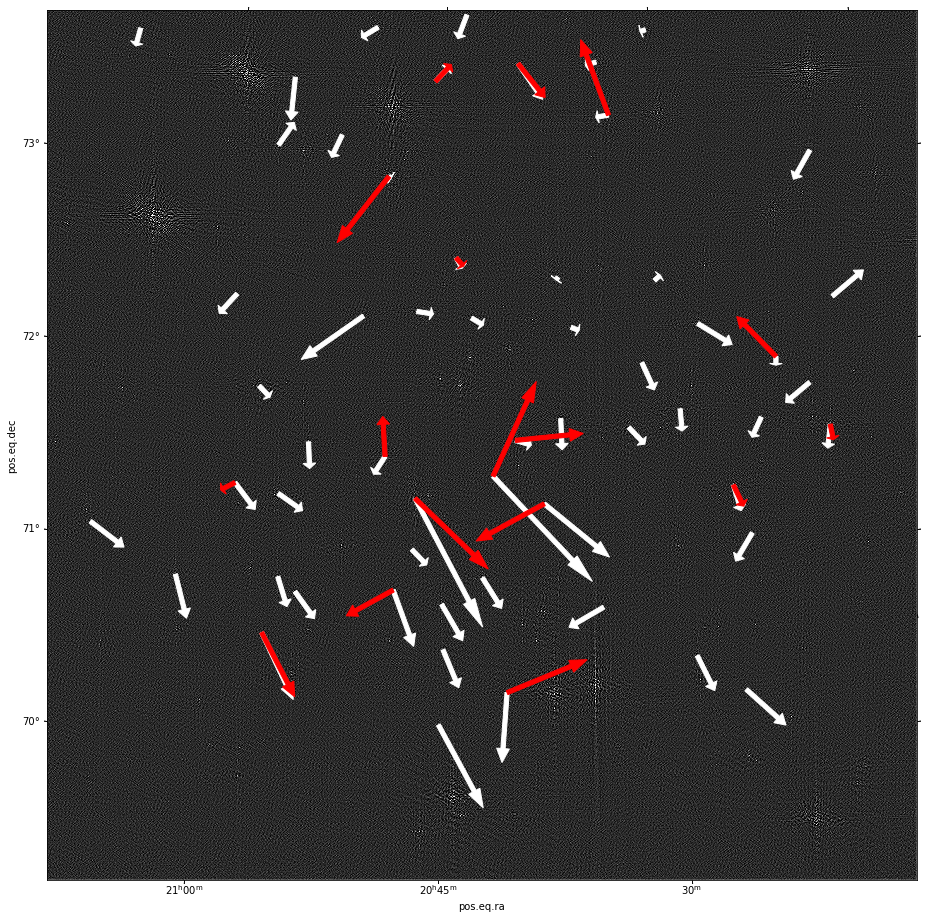

In [13]:
im.fig